## Machine Learning with Tree-Based Models in Python

### CHAPTER 1. Classification and Regression Trees (CART)

#### 1.1 Decision tree for classification

* Sequence of if-else questions about individual features
* **Objective**: infer class labels
* Able to capture non-linear relationships between features and labels
* Don't require feature scaling like *standardization*

In [1]:
# classification tree in scikit-learn
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# get dataset
breast_df = pd.read_csv('4_datasets/breast_cancer.csv')
breast_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [2]:
# extract X, y and split data
X = breast_df[['radius_mean', 'concave points_mean']].values
y = breast_df['diagnosis']=='M'
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# create a tree model
dt = DecisionTreeClassifier(max_depth=6, random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.91


In [3]:
# logistic regression VS. classification tree
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print("Test set accuracy for logreg: {:.2f}".format(acc))


Test set accuracy for logreg: 0.89


In [4]:
# create a list containing two classifiers
# clfs = [logreg, dt]

# create plot function
# since the function is too complicated, we will skip this

import matplotlib.pyplot as plt

# def plot_labeled_decision_regions(X,y, models):
#     '''
#     Function producing a scatter plot of the instances contained
#         in the 2D dataset (X,y) along with the decision
#         regions of two trained classification models contained in the
#         list 'models'.
#     Parameters
#         X: pandas DataFrame corresponding to two numerical features
#         y: pandas Series corresponding the class labels
#         models: list containing two trained classifiers
#     '''
#
#     if len(models) != 2:
#         raise Exception('''
#                 Models should be a list containing only two trained classifiers.       ''')
#     if not isinstance(X, pd.DataFrame):
#             raise Exception('''
#             X has to be a pandas DataFrame with two numerical features.
#                     ''')
#     if not isinstance(y, pd.Series):
#                 raise Exception('''        y has to be a pandas Series corresponding to the labels.        ''')
#     fig, ax = plt.subplots(1, 2, figsize=(6.0,2.7), sharey=True)
#     for i, model in enumerate(models):
#             plot_decision_regions(X.values,y.values, model, legend= 2, ax = ax[i])
#             ax[i].set_title(model.__class__.__name__)
#             ax[i].set_xlabel(X.columns[0])
#             if i == 0:
#                 ax[i].set_ylabel(X.columns[1])
#                 ax[i].set_ylim(X.values[:,1].min(), X.values[:,1].max())
#                 ax[i].set_xlim(X.values[:,0].min(), X.values[:,0].max())
#                 plt.tight_layout()
#                 plt.show()

# plot
# plot_labeled_decision_regions(X_test, y_test, clfs)

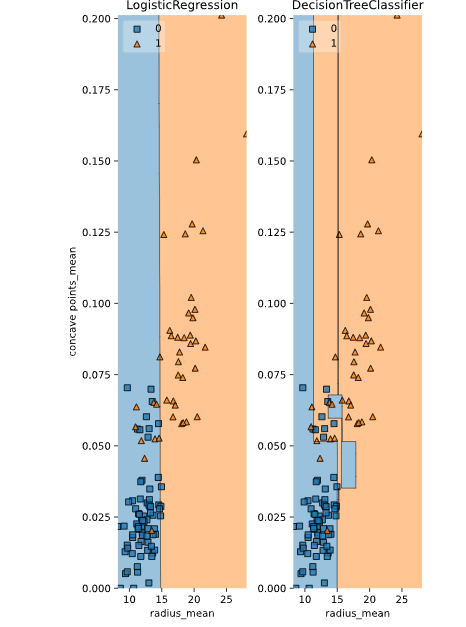

In [5]:
# show plot from local file instead
from IPython import display
display.Image("Images/4_logreg_vs_decision_tree.PNG")

#### 1.2 Classification tree Learning

* **Decision-Tree**: data structure consisting of a hierarchy of nodes
* **Node**: question or prediction

Three kinds of nodes:
1. **Root**: no parent node, question giving rise to two children nodes
2. **Internal node**: one parent node, question giving rise to two children nodes
3. **Leaf**: one parent node, no children nodes -> *prediction*

* The **information gain** is key to a classification tree
* The goal is to *maximize* the information gain (IG) after each split

The criteria to measure the impurity of a node -> I(node):
1. gini index (default in DT model)
2. entropy

The classification tree learning process:
* Nodes are grown recursively
* At each node, split the data based on feature f and split-point sp to maximize IG(node)
* If IG(node)=0, declare the node a leaf

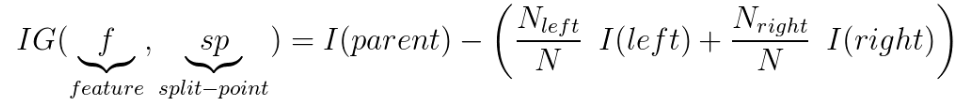

In [6]:
# information gain equation image
from IPython import display
display.Image("Images/5_information_gain.PNG")

In [7]:
# using gini and entropy as information gain criterion
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# get dataset
breast_df = pd.read_csv('4_datasets/breast_cancer.csv')
breast_df.head()
print(breast_df.shape)

# clean data and split data
breast_df = breast_df.drop(['id', 'Unnamed: 32'], axis=1)
X = breast_df.drop('diagnosis', axis=1).values
y = breast_df['diagnosis']== 'M'
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

(569, 33)


In [8]:
# make a DT model with gini
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)
y_pred = dt_gini.predict(X_test)
accuracy_gini = accuracy_score(y_pred, y_test)

# make a DT model with entropy
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)
y_pred = dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score(y_pred, y_test)

# compare results
print("Accuracy achieved by using entropy: ", accuracy_entropy)
print("Accuracy achieved by using the gini index: ", accuracy_gini)

Accuracy achieved by using entropy:  0.9230769230769231
Accuracy achieved by using the gini index:  0.9230769230769231


#### 1.3 Decision-Tree for Regression

* Use decision-tree to solve regression problems
* The target is continuous value
* It is able to capture non-linear trend

The information criterion for Regression-Tree is as follows:
* impurity of node is the same as mean squared error of that node
* It tries to find splits that produce leafs that target values are on average

Predictions are as follows:
* It is computed as the average of target-variables contained in that leaf

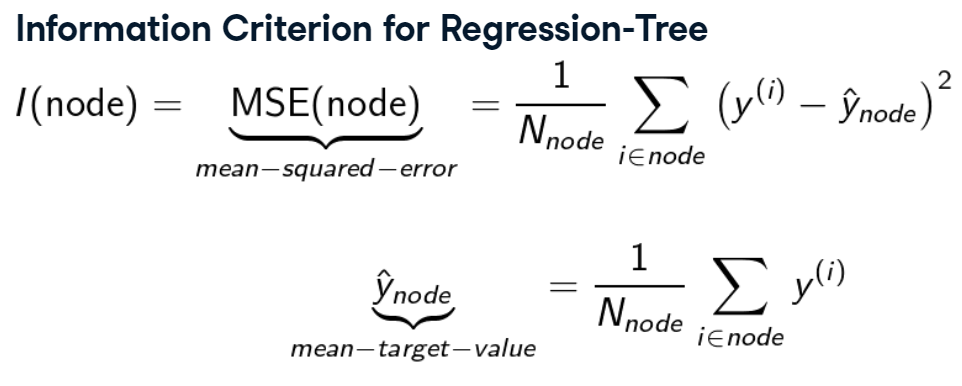

In [9]:
# show image for information criterion
from IPython import display
display.Image("Images/5_information_criterion_regression.PNG")

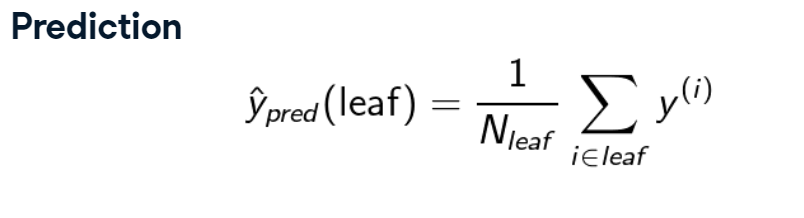

In [10]:
# show image for prediction
display.Image("Images/5_prediction.PNG")

In [11]:
# regression tree in scikit-learn
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# get dataset
auto_mpg = pd.read_csv('4_datasets/auto-mpg.csv')

# clean data
auto_mpg = pd.get_dummies(auto_mpg)
auto_mpg.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [12]:
# extract and split data
X = auto_mpg.drop('mpg', axis=1)
y = auto_mpg['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=3)

# craete a DT regression model
dt = DecisionTreeRegressor(max_depth=8,
                           min_samples_leaf=0.13,
                           random_state=3)
dt.fit(X_train, y_train)

# evaluate model
y_pred = dt.predict(X_test)
mse_dt = MSE(y_test, y_pred)
rmse_dt = mse_dt**(1/2)
print("Decision Tree test set RMSE: {:.2f}".format(rmse_dt))

Decision Tree test set RMSE: 4.37


In [13]:
# compare with Linear regression model
from sklearn.linear_model import LinearRegression

# create a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# evaluate model
y_pred_lr = lr.predict(X_test)
mse_lr = MSE(y_test, y_pred_lr)
rmse_lr = mse_lr**(1/2)
print("Linear regression test set RMSE: {:.2f}".format(rmse_lr))

Linear regression test set RMSE: 5.10


### CHAPTER 2. The Bias-Variance Tradeoff

#### 2.1 Generalization Error

* Supervised learning: $y=f(x)$
* Supervised learning tries to find a model that best approximates $f$:
$$ \hat{f} \approx f $$
* Discard noise as much as possible in data set
* **Final Goal**: $\hat {f}$ should achieve a low predictive error on unseen data

Difficulties in approximating $f$:
1. **Overfitting**: $\hat{f} (x)$ fits the training set noise
2. **Underfitting**: $\hat{f}$ is not flexible enough to approximate $f$

Generalization Error:
* Does $\hat{f}$ generalize well on unseen data?
* It can be composed of three parts:
$$\hat{f} = bias^2 + variance + irreducible error$$
* **Bias**: error term that tells you, on average, how much $\hat{f} \neq f$
* High bias -> underfitting
* **Variance**: tells you how much $\hat{f}$ is inconsistent over different training sets
* High variance -> overfitting
* Thus, it is important to choose the appropriate model complexity as the below diagram shows. In this way, you find a balance between bias and variance.


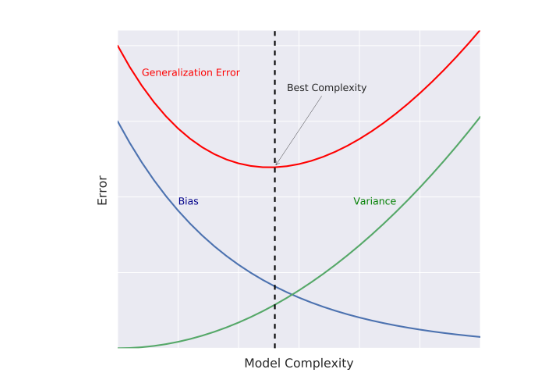

In [14]:
# Bias-variance tradeoff diagram
from IPython import display
display.Image("Images/4_bv_tradeoff.PNG")

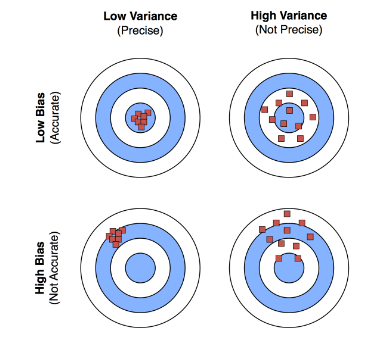

In [15]:
# Visualization of bias and variance
display.Image("Images/4_bias_variance.PNG")

#### 2.2 Dianosing Bias and Variance Problems

How do we estimate the generalization error of a model?
* split the data to **training and test sets**
* fit $\hat{f}$ to the training set
* evaluate the error of $\hat{f}$ on the unseen test set
* generalization error of $\hat{f} \approx $ test set error of $\hat{f}$

However:
* Test set should not be touched until we are confident about $\hat{f}$'s performance
* We use **Cross-Validation (CV)** to solve this

Types of Cross-Validation (CV):
1. K-Fold CV
2. Hold-Out CV

After had cross-validation error, check it with $\hat{f}$'s training set error:
* If cross-validation error is greater, the model has high variance or overfitting.
* To remedy overfitting, try:
1. decrease model complexity
2. gather more data

* If cross-validation error and training set error are similar, but much greater than desired error, the model has high bias or underfitting.
* To remedy underfitting, try:
1. increase model complexity
2. gather more relevant features

In [16]:
# K-Fold CV in scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# get dataset
auto_mpg = pd.read_csv('4_datasets/auto-mpg.csv')
auto_mpg = pd.get_dummies(auto_mpg)
auto_mpg.head()

,mpg,displ,hp,weight,accel,size,origin_Asia,origin_Europe,origin_US
0,18.0,250.0,88,3139,14.5,15.0,0,0,1
1,9.0,304.0,193,4732,18.5,20.0,0,0,1
2,36.1,91.0,60,1800,16.4,10.0,1,0,0
3,18.5,250.0,98,3525,19.0,15.0,0,0,1
4,34.3,97.0,78,2188,15.8,10.0,0,1,0


In [17]:
from sklearn.model_selection import cross_val_score
# extract and split data
X = auto_mpg.drop('mpg', axis=1)
y = auto_mpg['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=1)
# create a DT regression model
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=1)

# get CV score
MSE_CV_scores = -cross_val_score(dt, X_train, y_train, cv=10,
                                 scoring='neg_mean_squared_error',
                                 n_jobs=-1)
RMSE_CV = (MSE_CV_scores.mean())**(1/2)
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 5.14


In [18]:
# get training error
from sklearn.metrics import mean_squared_error as MSE
dt.fit(X_train, y_train)
y_pred_train = dt.predict(X_train)
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)
print('Train RMSE: {:.2f}'.format(RMSE_train))

Train RMSE: 5.15


**Conclusion**:
Training error and CV error are similar, but they both are greater than baseline error, which is only 5. Thus, the model has **high bias** and is **underfitted**.

#### 2.3 Ensemble learning

Advantages of Classification and Regression Tree (CART):
1. Easy to understand
2. Easy to interpret
3. Easy to use
4. Flexibility: ability to describe non-linear dependencies
5. Preprocessing: no need to standardize or normalize features


Limitations of Classification and Regression Tree (CART):
1. Classification: can only produce orthogonal decision boundaries
2. Sensitive to small variations in training set
3. High variance: unconstrained CART may overfit the training set


**Solution**: Ensemble learning!

Ensemble learning can be summarized as follows:
* Train different models on the same dataset
* Let each model makes its predictions
* Meta-model: aggregates predictions of individual models
* **Final prediction**: more robust and less prone to errors
* Example: Voting classifier

In [19]:
# ensemble learning in scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# get dataset
liver_patient = pd.read_csv('4_datasets/indian_liver_patient_preprocessed.csv')
X = liver_patient.drop('Liver_disease', axis=1)
y = liver_patient['Liver_disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# create a LR classification model
lr = LogisticRegression(random_state=1)

# create a KNN classification model
knn = KNN(n_neighbors=27)

# create a DT classification model
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=1)

# create classifiers list
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbors', knn), ('Classification Tree', dt)]

# loop over classifiers
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

# better performance with a voting classifier
from sklearn.ensemble import VotingClassifier

# create a VC model
vc = VotingClassifier(estimators=classifiers)
vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Voting classifier: {:.3f}'.format(accuracy))

# voting classifier has higher accuracy than any individual model!

Logistic Regression : 0.764
K Nearest Neighbors : 0.724
Classification Tree : 0.730


E:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = sta

Voting classifier: 0.764


E:\ANACONDA\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
E:\ANACONDA\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = sta

### CHAPTER 3. Bagging and Random Forests

#### 3.1 Bagging

Differences of voting classifier and bagging:
* Ensemble voting classifier uses **one (same) training set** with **different algorithms**
* Bagging uses **one (same) algorithm**, but trained on **different subsets of the data**

Bagging:
* Bagging stands for **bootstrap aggregation**
* It uses a technique called **bootstrap**, which means sample with replacement
* Reduces variance of individual models in ensemble

Bagging prediction:
* For classification: final prediction aggregates predictions by majority voting
* For regression: final prediction aggregates predictions by averaging

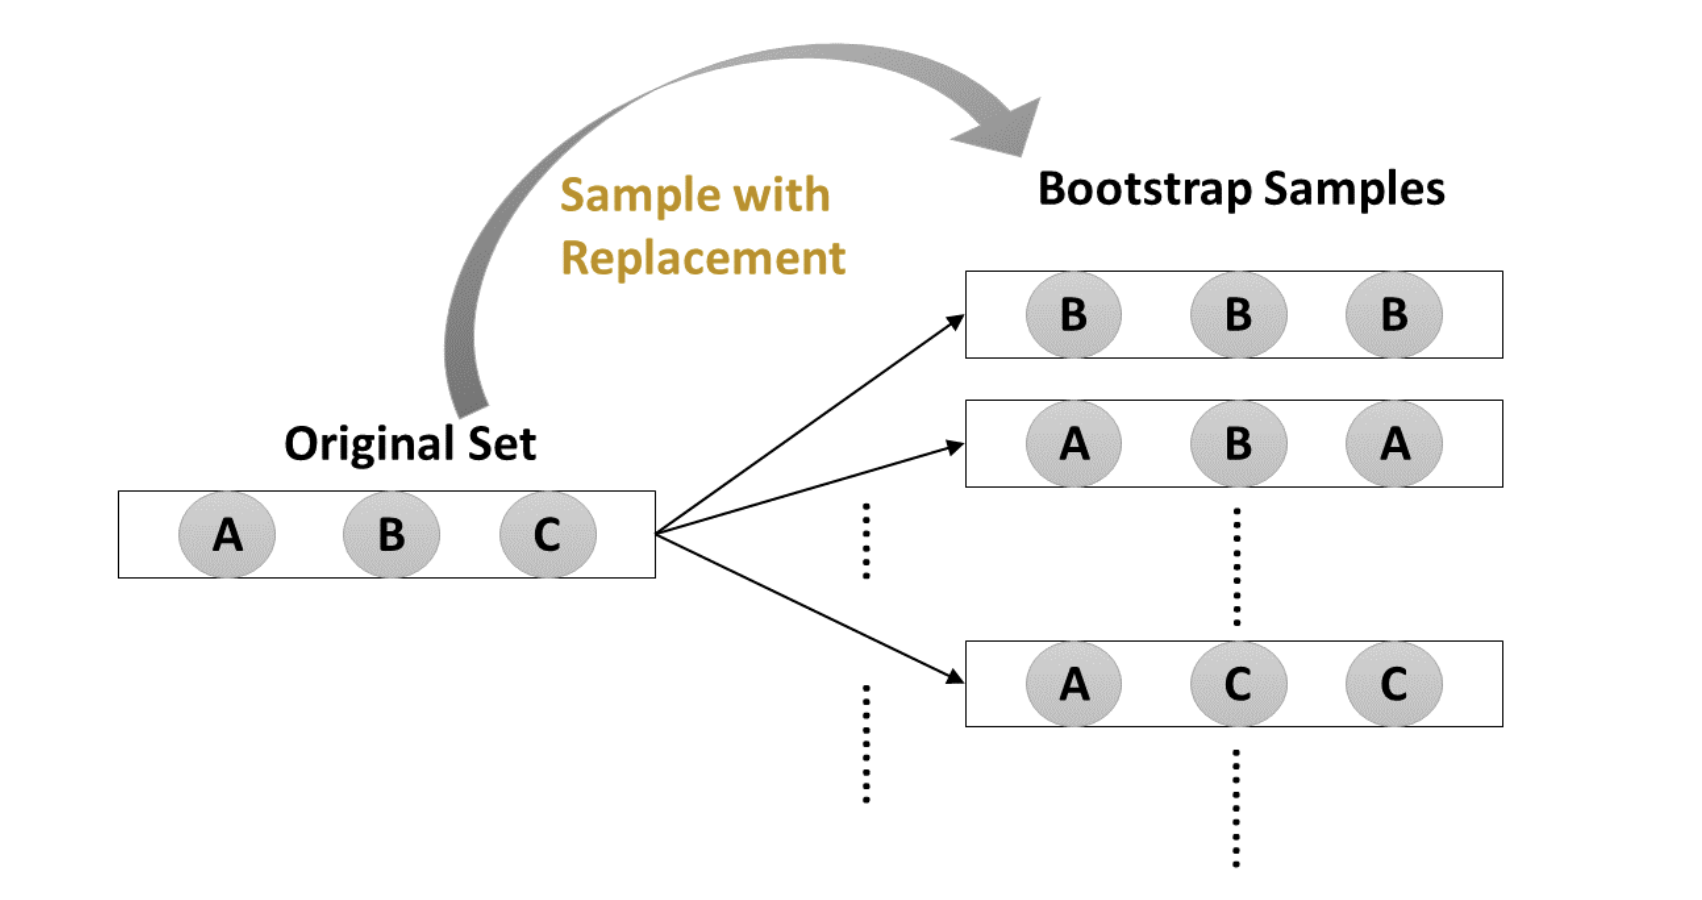

In [20]:
# images about bootstrap
from IPython import display
display.Image('Images/4_bootstrap.PNG')

In [21]:
# bagging in scikit-learn
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# create DT and its BC classification model
dt = DecisionTreeClassifier(random_state=1)
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

# get dataset
liver_patient = pd.read_csv('4_datasets/indian_liver_patient.csv')
# liver_patient.head()

# preprocess data
liver_patient = pd.get_dummies(liver_patient, drop_first=True)
liver_patient = liver_patient.dropna()
print(liver_patient.shape)
print(liver_patient.head())
print(liver_patient.isna().sum())

(579, 11)
   Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  Gender_Male  
0      3.3                        0.90        1            0  
1      3.2

In [22]:
# extract and split data
X = liver_patient.drop('Dataset', axis=1)
y = liver_patient['Dataset']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# fit BC model to data
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
print('Bagging classifier test set accuracy: {:.2f}'.format(acc_test))

Bagging classifier test set accuracy: 0.72


In [23]:
# fit DT model to data
dt.fit(X_train, y_train)
y_pred_dt =dt.predict(X_test)
acc_test_dt = accuracy_score(y_test, y_pred_dt)
print('Decision Tree classifier test set accuracy: {:.2f}'.format(acc_test_dt))

Decision Tree classifier test set accuracy: 0.64


**Conclusion**:
The performance of bagging classifier is better than individual decision tree classifier!

#### 3.2  Out of Bag (OOB) Evaluation

* For each model, with bagging technique, an average of 63% of the training instances are sampled
* The remaining 37% of instances are the Out of Bag (OOB) instances
* OOB instances can be used for model evaluation like cross-validation

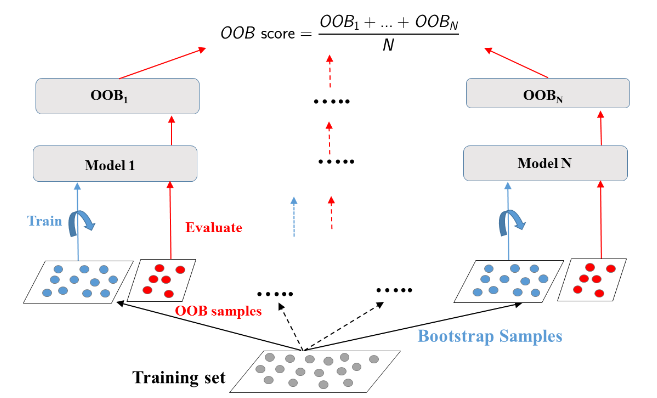

In [24]:
# OOB evaluation diagram
from IPython import display
display.Image("Images/4_OOB_evaluation.PNG")

In [25]:
# OOB evaluation in scikit-learn
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# create BC classification model
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)
bc = BaggingClassifier(base_estimator=dt, n_estimators=50,
                       oob_score=True, random_state=1)

# get dataset
# the data is the same as last exercise, we just use that

# fit model to data
bc.fit(X_train, y_train)
y_pred = bc.predict(X_test)
acc_test = accuracy_score(y_test, y_pred)
acc_oob = bc.oob_score_

print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

Test set accuracy: 0.698, OOB accuracy: 0.676


#### 3.3 Random Forests

* Another ensemble method is called "**Random Forests**"

Recall for bagging method:
* The base estimator in bagging method can be any model: Decision Tree, Logistic Regression, Neural Network, and so on
* Each estimator in bagging is trained on a boostrap model using all features

However, in random forests method:
* The base estimator is Decision Tree
* Each estimator is trained on a bootstrap model, but using only $d$ features without replacement
$(d < total number of features)$
* Default value of $d$ is the squared root value of total number of features

**Final prediction**:
* For classification: aggregates predictions by majority voting
* For regression: aggregates predictions through averaging

**Feature Importance**:
* Tree-based models also enable measuring the importance of each feature in prediction

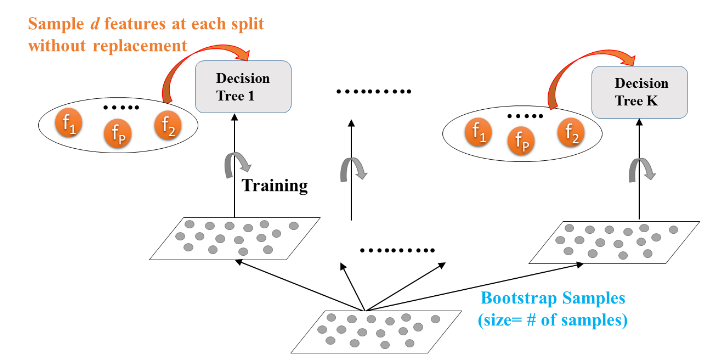

In [26]:
# random forests diagram
display.Image("Images/4_random_forests.PNG")

In [27]:
# random forests in scikit-learn
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# get dataset
bike_df = pd.read_csv('4_datasets/bike_sharing.csv')
X = bike_df.drop(['cnt'], axis=1)
y = bike_df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=2)

# create a RF regression model
rf = RandomForestRegressor(n_estimators=25, random_state=2)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
rmse_test = MSE(y_test, y_pred) ** (1/2)

print('Test set RMSE of rf: {:.2f}'.format(rmse_test))

Test set RMSE of rf: 54.49


In [28]:
# compare with DT regression model
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.16, random_state=2)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
rmse_test_dt = MSE(y_test, y_pred_dt)

print('Test set RMSE of dt: {:.2f}'.format(rmse_test_dt))

Test set RMSE of dt: 21946.84


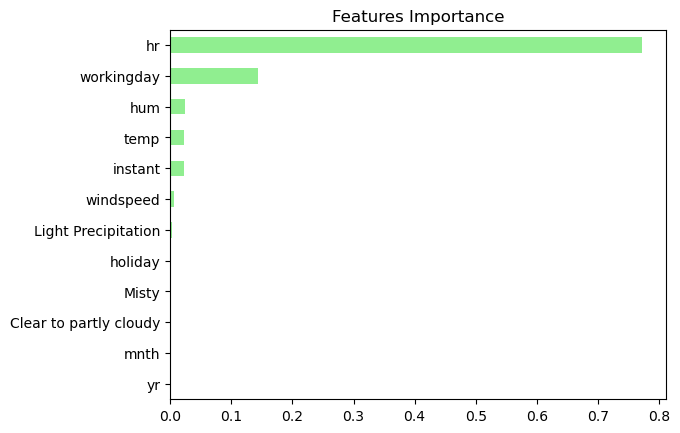

In [29]:
# visualize features importance
import matplotlib.pyplot as plt
importances = pd.Series(data=rf.feature_importances_, index=X_train.columns)
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importance')
plt.show()

### CHAPTER 4. Boosting

#### 4.1 AdaBoost

* Boosting is an ensemble method that involves many predictors
* The predictors are trained sequentially
* Each predictor learns from the errors of its predecessor.
* It combines several **weak learners** to form a **strong learner**

Two types of popular boosting methods:
1. AdaBoost (Adaptive Boosting)
2. Gradient Boosting

**AdaBoost**:
* Each predictor pays more attention to the instances wrongly predicted by its predecessor
* Achieved by changing the **weights** of training instances
* Each predictor is assigned a coefficient **$\alpha$**
* $\alpha$ depends on the predictor's training error or contribution to the final decision
* There is an important parameter in this process: learning rate $\eta$, which is between 0 and 1
* **Learning rate** is used to shrink the coefficient $\alpha$ of a training predictor
* A small value of $\eta$ should be compensated by a greater number of estimators
* The most common base estimators in AdaBoost is CART

**Final Prediction**:
* For classification: weighted majority voting
* For regression: weight average

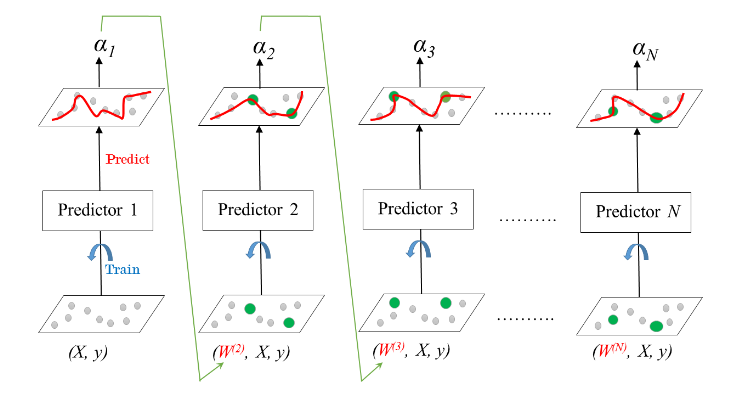

In [30]:
# show AdaBoost diagram
from IPython import display
display.Image("Images/4_adaboost.PNG")

In [31]:
# AdaBoost in scikit-learn
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

# create DT and ADA classification model
dt = DecisionTreeClassifier(max_depth=2, random_state=1)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

# get dataset
liver_patient = pd.read_csv('4_datasets/indian_liver_patient.csv')
# liver_patient.head()

# preprocess data
liver_patient = pd.get_dummies(liver_patient, drop_first=True)
liver_patient = liver_patient.dropna()
print(liver_patient.shape)
print(liver_patient.head())
print(liver_patient.isna().sum())


(579, 11)
   Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65              0.7               0.1                   187   
1   62             10.9               5.5                   699   
2   62              7.3               4.1                   490   
3   58              1.0               0.4                   182   
4   72              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  Gender_Male  
0      3.3                        0.90        1            0  
1      3.2

In [34]:
from sklearn.metrics import roc_auc_score

# extract and split data
X = liver_patient.drop('Dataset', axis=1)
y = liver_patient['Dataset']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# fit model to data
ada.fit(X_train, y_train)
y_pred_proba = ada.predict_proba(X_test)[:, 1]
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.73


#### 4.2 Gradient Boosting (GB)

* **Gradient Boosting** is a popular boosting algorithm that wins many machine learning competitions
* In contrast to AdaBoost, the **weights** of the training instances are **not tweaked**
* Each predictor is trained using the **residual error of its predecessor** as labels
* The base learner is Gradient Boosting Trees is CART
* There is an important parameter used called **shrinkage** or **learning rate** $\eta$


**Final prediction**:
* For regression:
$$ypred = y_{1} + \eta r_{1} + ... + \eta r_{N}$$
* For classification:
* Similar formulas as regression problem

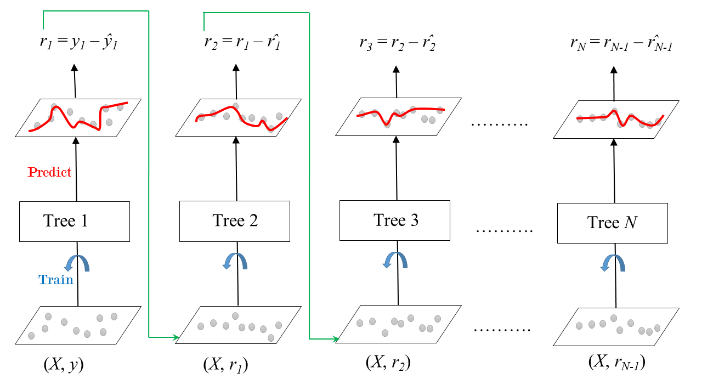

In [35]:
# gradient boosting diagram
from IPython import display
display.Image("Images/4_gradient_boosting.PNG")

In [37]:
# gradient boosting in scikit-learn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

# get dataset
bike_df = pd.read_csv('4_datasets/bike_sharing.csv')

# extract and split data
X = bike_df.drop('cnt', axis=1)
y = bike_df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# create a GB regression model
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=200,
                               random_state=2)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

# evaluate model
mse_test = MSE(y_test, y_pred)
rmse_test = mse_test**(1/2)
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 49.537


#### 4.3 Stochastic Gradient Boosting (SGB)

* GB involves an exhuastive search procedure
* Each CART is trained to find the best split points and features
* May lead to CARTs using the same split points and maybe the same features
* Solution: **Stochastic Gradient Boosting**!

**Stochastic Gradient Boosting**:
* Each tree is trained on a random subset of rows of the training data
* The sampled instances are sampled without replacement
* Features are sampled without replacement when choosing split points
* **Result**: further ensemble diversity
* **Effect**: adding further variance to the ensemble of trees

In [29]:
# SGB diagram
from IPython import display
display.Image("Images/4_sgb.PNG")

In [38]:
# stochastic gradient boosting in scikit-learn
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

# use the same 'bike_df' dataset, so we don't have to import

# make SGB regression model
sgbr = GradientBoostingRegressor(max_depth=4,
                                 subsample=0.9, #subset of rows of data
                                 max_features=0.75, #sampled features
                                 n_estimators=200,
                                 random_state=2)

sgbr.fit(X_train, y_train)
y_pred = sgbr.predict(X_test)

# evaluate the model
mse_test = MSE(y_test, y_pred)
rmse_test = mse_test**(1/2)
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))


Test set RMSE of sgbr: 47.260


The RMSE of SGB is even slight lower than GB model!

### CHAPTER 5. Tuning

#### 5.1 Tuning a CART's Hyperparameters

*